## Time series preprocessing

In [1]:
# DAL ToolBox
# version 1.0.53

source("https://raw.githubusercontent.com/cefet-rj-dal/dal/main/examples/jupyter_daltoolbox.R")

#loading DAL
load_daltoolbox() 

Warning message:
“replacing previous import ‘dplyr::rename’ by ‘reshape::rename’ when loading ‘daltoolbox’”
Warning message:
“replacing previous import ‘class::condense’ by ‘reshape::condense’ when loading ‘daltoolbox’”
Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘daltoolbox’”


### Cosine series for studying

In [2]:
i <- seq(0, 2*pi, pi/50)
x <- cos(i)

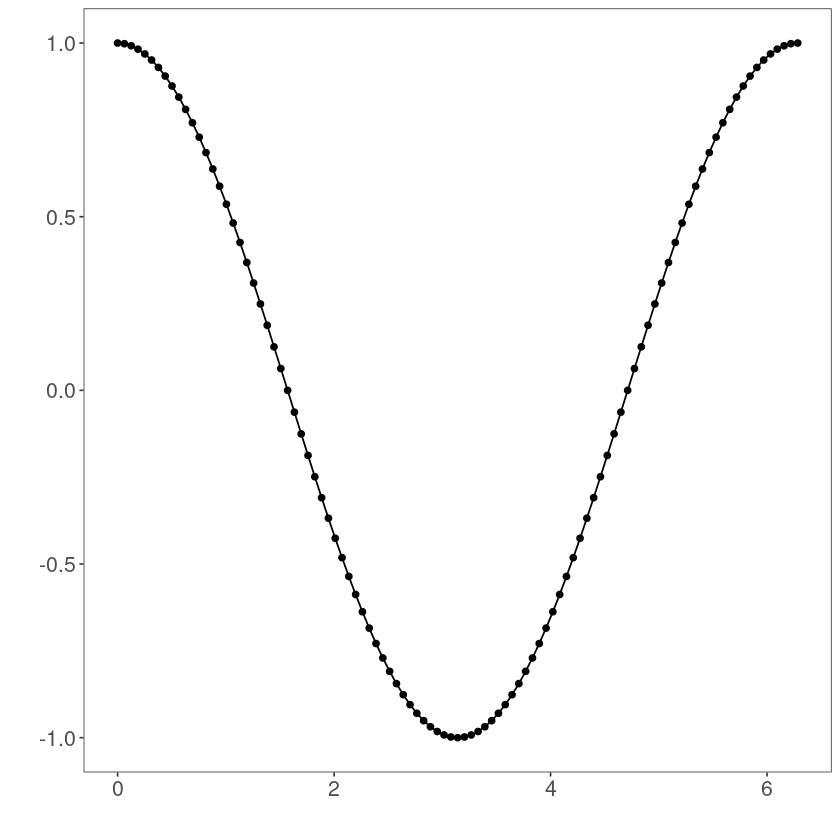

In [3]:
library(ggplot2)
ts_plot(x=i, y=x) + theme(text = element_text(size=16))

### sliding windows

In [4]:
sw_size <- 10
ts <- ts_data(x, sw_size)
tshead(ts, 3)
summary(ts[,10])

t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
1.0000000,0.9980267,0.9921147,0.9822873,0.9685832,0.9510565,0.9297765,0.9048271,0.8763067,0.8443279
0.9980267,0.9921147,0.9822873,0.9685832,0.9510565,0.9297765,0.9048271,0.8763067,0.8443279,0.8090170
0.9921147,0.9822873,0.9685832,0.9510565,0.9297765,0.9048271,0.8763067,0.8443279,0.8090170,0.7705132


       t0          
 Min.   :-1.00000  
 1st Qu.:-0.73935  
 Median :-0.12533  
 Mean   :-0.08264  
 3rd Qu.: 0.54882  
 Max.   : 1.00000  

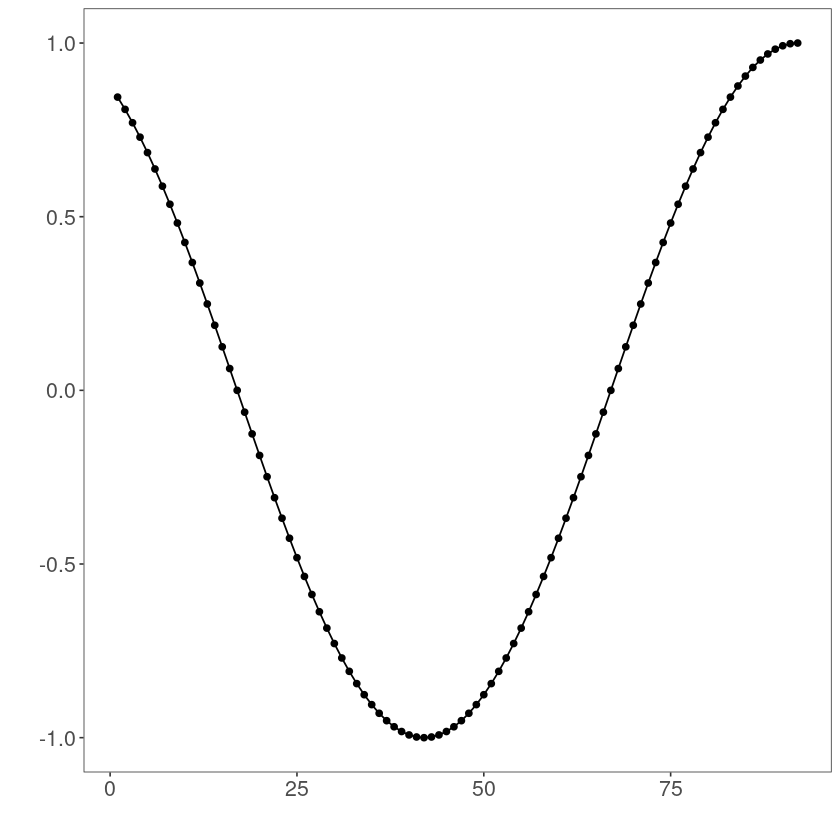

In [5]:
library(ggplot2)
ts_plot(y=ts[,10]) + theme(text = element_text(size=16))

### global min-max

t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
1.0000000,0.9990134,0.9960574,0.9911436,0.9842916,0.9755283,0.9648882,0.9524135,0.9381533,0.9221640
0.9990134,0.9960574,0.9911436,0.9842916,0.9755283,0.9648882,0.9524135,0.9381533,0.9221640,0.9045085
0.9960574,0.9911436,0.9842916,0.9755283,0.9648882,0.9524135,0.9381533,0.9221640,0.9045085,0.8852566


       t0        
 Min.   :0.0000  
 1st Qu.:0.1303  
 Median :0.4373  
 Mean   :0.4587  
 3rd Qu.:0.7744  
 Max.   :1.0000  

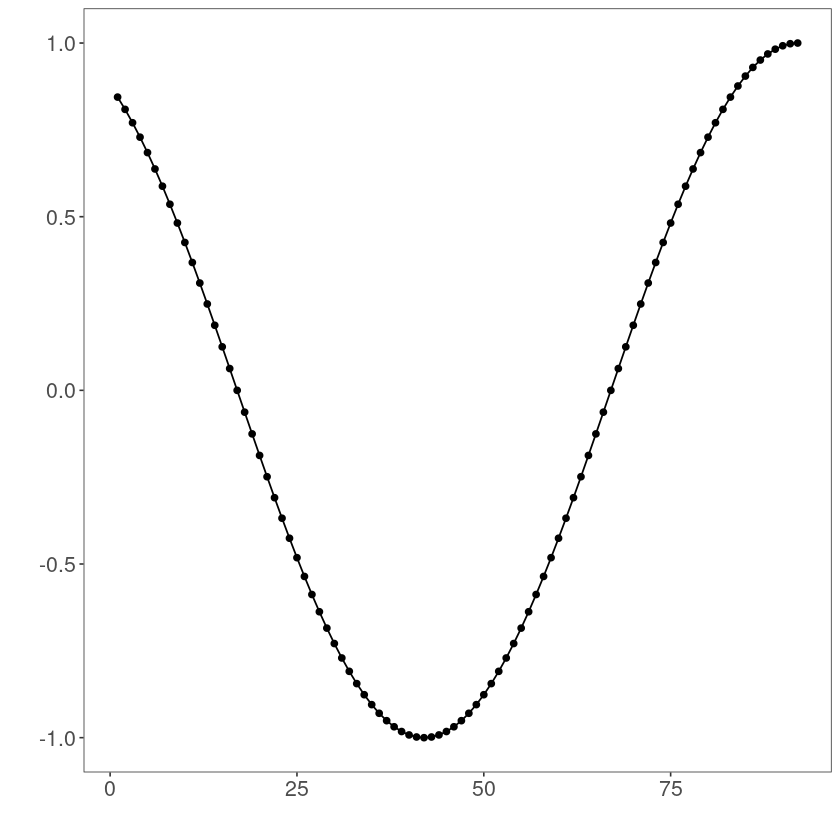

In [6]:
preproc <- ts_gminmax()
preproc <- fit(preproc, ts)
tst <- transform(preproc, ts)
tshead(tst, 3)
summary(tst[,10])
ts_plot(y=ts[,10]) + theme(text = element_text(size=16))

### global min-max (differentiation)

t8,t7,t6,t5,t4,t3,t2,t1,t0
0.4842869,0.4529226,0.4217442,0.3908745,0.3604356,0.3305474,0.3013280,0.2728927,0.2453536
0.4529226,0.4217442,0.3908745,0.3604356,0.3305474,0.3013280,0.2728927,0.2453536,0.2188196
0.4217442,0.3908745,0.3604356,0.3305474,0.3013280,0.2728927,0.2453536,0.2188196,0.1933952


       t0        
 Min.   :0.0000  
 1st Qu.:0.1248  
 Median :0.5627  
 Mean   :0.5107  
 3rd Qu.:0.8752  
 Max.   :1.0000  

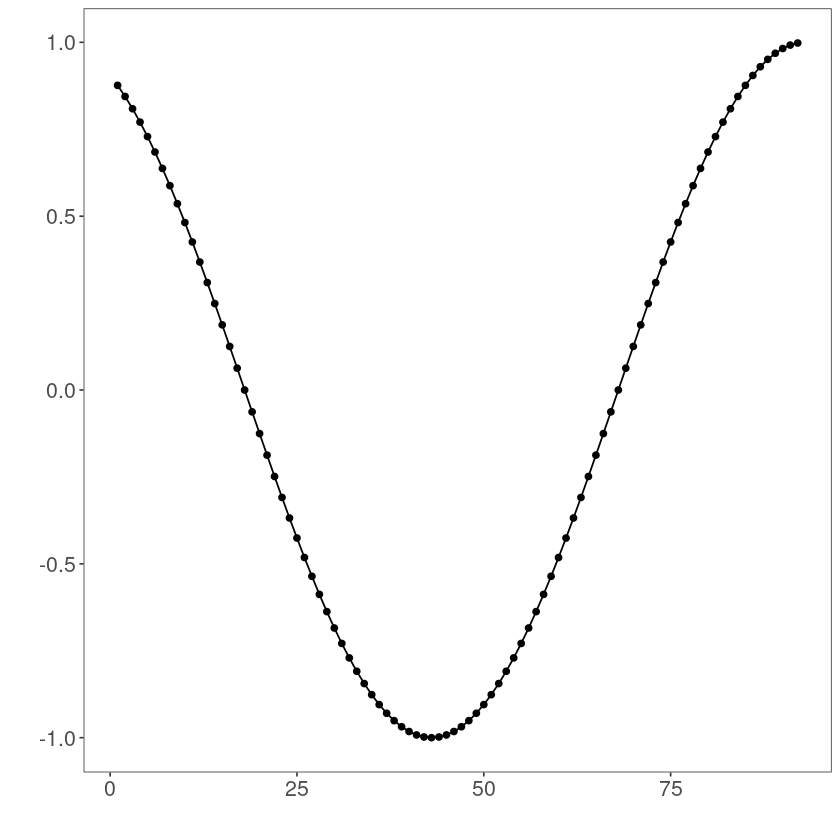

In [7]:
preproc <- ts_diff()
preproc <- fit(preproc, ts)
tst <- transform(preproc, ts)
tshead(tst, 3)
summary(tst[,9])
ts_plot(y=ts[,9]) + theme(text = element_text(size=16))

### sliding window min-max

t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
1,0.9873242,0.9493467,0.8862176,0.7981858,0.6855988,0.5489010,0.3886319,0.2054238,0
1,0.9687210,0.9167266,0.8442220,0.7514932,0.6389062,0.5069054,0.3560117,0.1868207,0
1,0.9556526,0.8938114,0.8147206,0.7186922,0.6061053,0.4774041,0.3330966,0.1737522,0


       t0        
 Min.   :0.0000  
 1st Qu.:0.0000  
 Median :0.8210  
 Mean   :0.5108  
 3rd Qu.:1.0000  
 Max.   :1.0000  

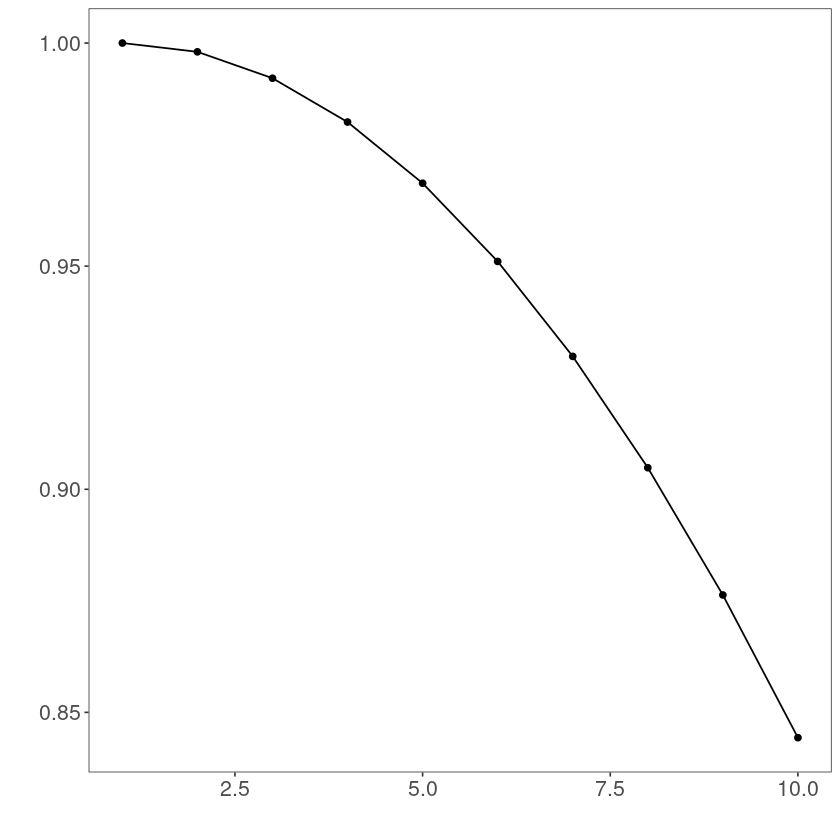

In [8]:
preproc <- ts_swminmax()
preproc <- fit(preproc, ts)
tst <- transform(preproc, ts)
tshead(tst, 3)
summary(tst[,10])
#ploting the first window
ts_plot(y=ts[1,]) + theme(text = element_text(size=16))

### sliding window adaptive normalization

t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
0.5888370,0.5856653,0.5761626,0.5603665,0.5383393,0.5101679,0.4759635,0.4358611,0.3900189,0.3386180
0.6163629,0.6068602,0.5910641,0.5690369,0.5408655,0.5066611,0.4665587,0.4207165,0.3693156,0.3125587
0.6434295,0.6276334,0.6056062,0.5774348,0.5432304,0.5031280,0.4572858,0.4058849,0.3491280,0.2872391


       t0        
 Min.   :0.0500  
 1st Qu.:0.1657  
 Median :0.5378  
 Mean   :0.5033  
 3rd Qu.:0.8343  
 Max.   :0.9500  

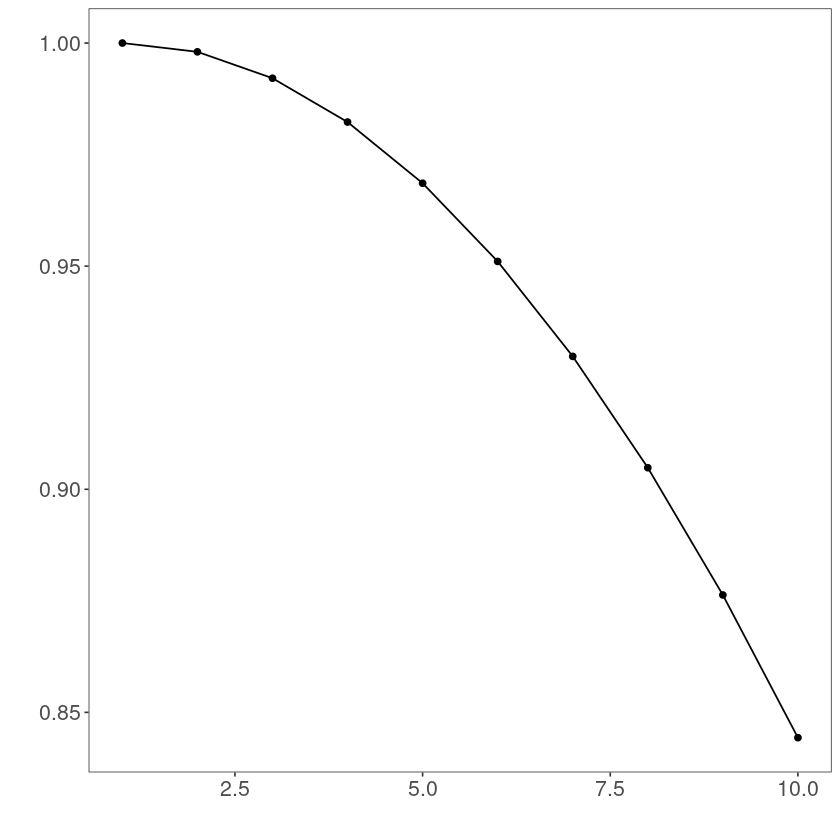

In [9]:
preproc <- ts_an()
preproc <- fit(preproc, ts)
tst <- transform(preproc, ts)
tshead(tst, 3)
summary(tst[,10])
#ploting the first window
ts_plot(y=ts[1,]) + theme(text = element_text(size=16))

### sliding window adaptive normalization
Using nw parameter

t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
0.6432297,0.6409659,0.6341833,0.6229088,0.6071868,0.5870793,0.5626658,0.5340425,0.5013225,0.4646349
0.6776053,0.6708227,0.6595482,0.6438261,0.6237187,0.5993052,0.5706819,0.5379619,0.5012743,0.4607638
0.7112799,0.7000053,0.6842833,0.6641759,0.6397623,0.6111391,0.5784191,0.5417315,0.5012210,0.4570475


       t0        
 Min.   :0.4280  
 1st Qu.:0.4465  
 Median :0.5090  
 Mean   :0.5014  
 3rd Qu.:0.5535  
 Max.   :0.5720  

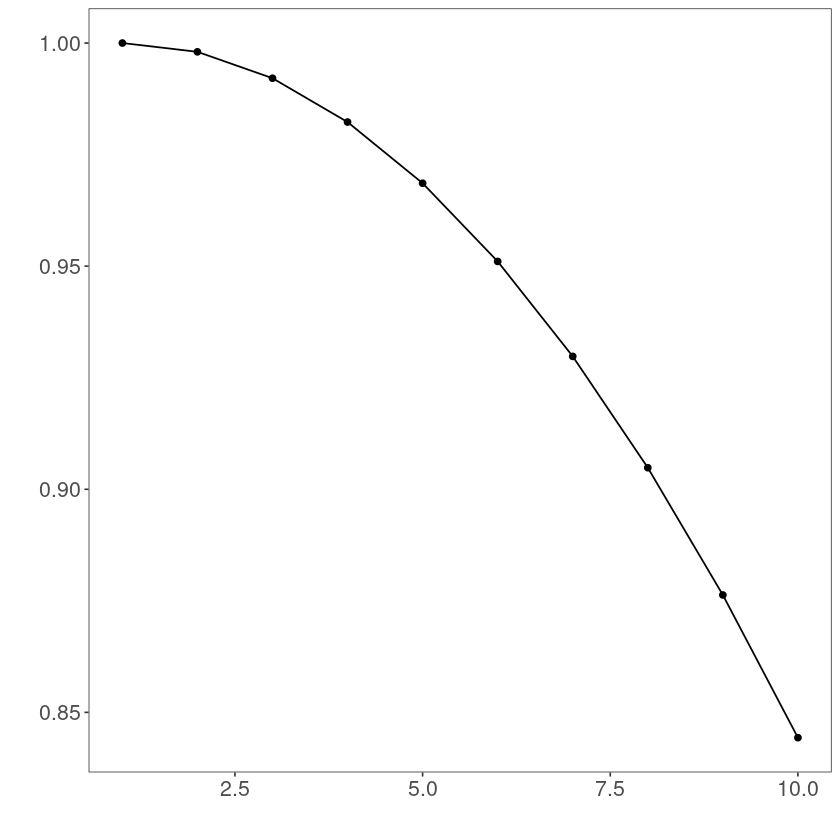

In [10]:
preproc <- ts_an(nw=3)
preproc <- fit(preproc, ts)
tst <- transform(preproc, ts)
tshead(tst, 3)
summary(tst[,10])
#ploting the first window
ts_plot(y=ts[1,]) + theme(text = element_text(size=16))

### sliding window adaptive normalization (exponential moving average)

t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
0.6250579,0.6221220,0.6133258,0.5987041,0.5783145,0.5522376,0.5205762,0.4834553,0.4410213,0.3934419
0.6590724,0.6502762,0.6356545,0.6152649,0.5891879,0.5575265,0.5204056,0.4779717,0.4303922,0.3778550
0.6924590,0.6778373,0.6574477,0.6313707,0.5997093,0.5625884,0.5201545,0.4725750,0.4200378,0.3627502


       t0        
 Min.   :0.2269  
 1st Qu.:0.2958  
 Median :0.5321  
 Mean   :0.5028  
 3rd Qu.:0.7042  
 Max.   :0.7731  

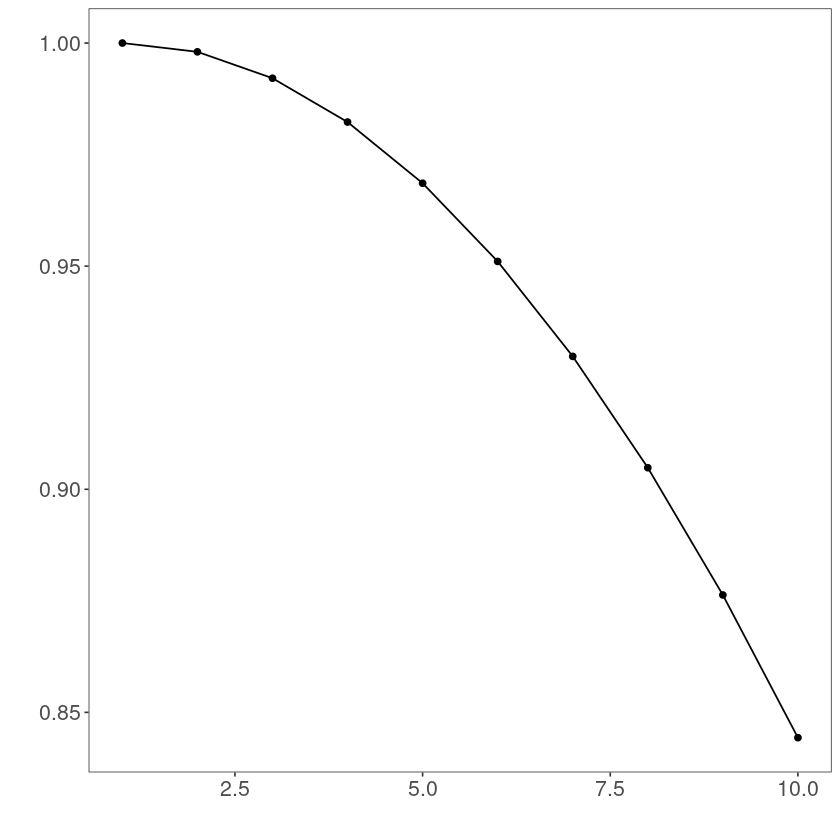

In [11]:
preproc <- ts_ean()
preproc <- fit(preproc, ts)
tst <- transform(preproc, ts)
tshead(tst, 3)
summary(tst[,10])
#ploting the first window
ts_plot(y=ts[1,]) + theme(text = element_text(size=16))

### sliding window adaptive normalization (exponential moving average)
using nw parameter

t9,t8,t7,t6,t5,t4,t3,t2,t1,t0
0.6491567,0.6470222,0.6406272,0.6299970,0.6151735,0.5962151,0.5731968,0.5462093,0.5153591,0.4807681
0.6831385,0.6767435,0.6661133,0.6512897,0.6323314,0.6093130,0.5823255,0.5514754,0.5168844,0.4786890
0.7163975,0.7057673,0.6909437,0.6719854,0.6489670,0.6219795,0.5911294,0.5565384,0.5183430,0.4766939


       t0        
 Min.   :0.4612  
 1st Qu.:0.4711  
 Median :0.5049  
 Mean   :0.5008  
 3rd Qu.:0.5289  
 Max.   :0.5388  

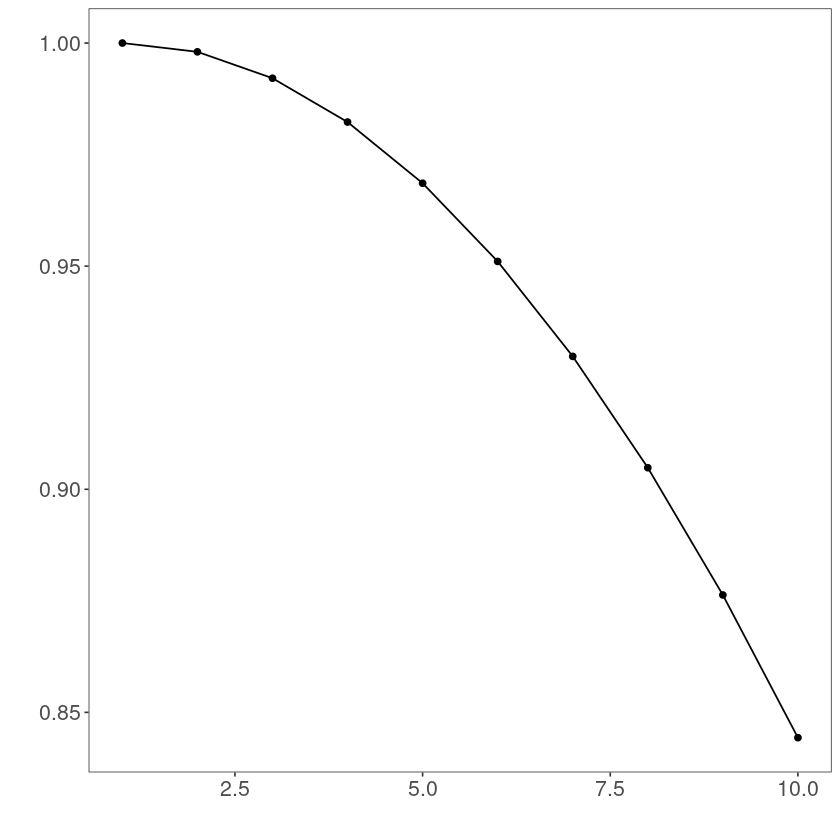

In [12]:
preproc <- ts_ean(nw = 3)
preproc <- fit(preproc, ts)
tst <- transform(preproc, ts)
tshead(tst, 3)
summary(tst[,10])
#ploting the first window
ts_plot(y=ts[1,]) + theme(text = element_text(size=16))